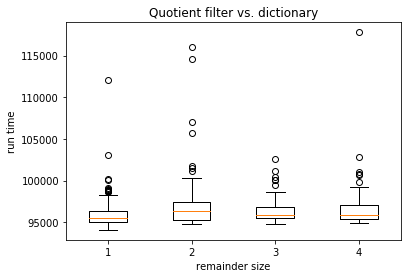

In [4]:
import json
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

results = json.load(open('benchmark_results.json','r'))
#print(json.dumps(results, indent=2, sort_keys=False))

runtimes = dict()
runtimes[0] = []
runtimes[8] = []
runtimes[16] = []
runtimes[32] = []
remainder_sizes = [o["remainder_size"] for o in results["results"]]
#runtimes = [o["runtime"] for o in results["results"]]

for result in results["results"]:
    runtimes[result["remainder_size"]].append(result["runtime"])
    
data = [runtimes[0], runtimes[8], runtimes[16], runtimes[32]]

plt.boxplot(data)
plt.title('Quotient filter vs. dictionary')
plt.xlabel('remainder size')
plt.ylabel('run time')
plt.show()
